<a href="https://colab.research.google.com/github/Manuel0104/Flaw-detection-in-steal-pipes-using-transformer-neural-networks-architecture/blob/main/Transformers_gsproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA AUGMENTATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import hilbert, butter, filtfilt

In [ ]:
path = '/content/drive/MyDrive/DATASET_11052023/Random /*.csv'
data_csv = glob.glob(path)
data_csv.sort()  # sort the list of file names

dfs = []
for file in data_csv:
    df = pd.read_csv(file)
    dfs.append(df)

In [ ]:
data_csv_names = np.array(data_csv)
data_csv_names.shape[0]

18

In [ ]:
sg_shapes = []
for i in range(data_csv_names.shape[0]):
    signal_shapes = dfs[i].shape
    sg_shapes.append(signal_shapes)

sg_shapes = np.array(sg_shapes)

signals = []
for i in range(sg_shapes.shape[0]):
    signal = dfs[i]
    signal = np.array(signal)
    signals.append(signal)

In [ ]:
signals[5][:,1].shape

(10001,)

In [ ]:
# initialize empty lists to store the time and amplitude arrays
s_t = []
s_a = []

# iterate over the signals array and extract the time and amplitude arrays for each signal
for i in range(sg_shapes.shape[0]):
    s_t.append(signals[i][:, 0])
    s_a.append(signals[i][:, 1])

# Automate the variable assignments using a loop
num_items = len(s_a)
for i in range(num_items):
    a_name = f"a{i+1}"  # Generate the variable name dynamically
    t_name = f"t{i+1}"
    locals()[a_name] = s_a[i]  # Assign value to dynamically generated variable
    locals()[t_name] = s_t[i]

In [ ]:
for i in range(18):
    if np.allclose(signals[i][:, 1], s_a[i]):
        print(f"Index {i}: Matched")
    else:
        print(f"Index {i}: Not matched")

Index 0: Matched
Index 1: Matched
Index 2: Matched
Index 3: Matched
Index 4: Matched
Index 5: Matched
Index 6: Matched
Index 7: Matched
Index 8: Matched
Index 9: Matched
Index 10: Matched
Index 11: Matched
Index 12: Matched
Index 13: Matched
Index 14: Matched
Index 15: Matched
Index 16: Matched
Index 17: Matched


In [ ]:
# create a pandas dataframe from the data
df = pd.DataFrame(s_a)
df = df.transpose()
columns=['F1','F2','F3','F4','ND1','ND2','ND3','ND4','ND5','ND6','ND7','ND8','ND9','ND91','ND92','ND93','ND94','ND95']
df.columns = columns
df.to_csv('unfiltered_signals.csv', index=False)

***FILTERED SIGNAL***

---



In [ ]:
filtered_signal_list = []  # List to store the filtered signals

for i in range(1, 19):
    t = globals()['t{}'.format(i)]
    amp = globals()['a{}'.format(i)]
    fs = (len(t) - 1) / (t[len(t)-1] - t[0])

    # Compute the FFT of the signal
    fft_x = np.fft.fft(amp)
    # Compute the frequency axis (in Hz)
    freq_domain = np.fft.fftfreq(len(amp), d=1/fs)

    # Plot only the positive half of the FFT (excluding the DC component)
    pos_mask = freq_domain > 0
    freqs_pos = freq_domain[pos_mask]
    fft_x_pos = np.abs(fft_x[pos_mask])
    fft_x_pos /= np.max(fft_x_pos)

    # Define the filter parameters
    f1 = 450000   # Lower cutoff frequency
    f2 = 650000  # Upper cutoff frequency
    order = 4    # Filter order

    # Create the Butterworth bandpass filter
    nyquist = 0.5 * fs
    low = f1 / nyquist
    high = f2 / nyquist
    b, a = butter(order, [low, high], btype='band')

    # Apply the filter to the signal
    filtered_signal = filtfilt(b, a, amp)
    env_filtered_signal = np.abs(hilbert(filtered_signal))
    fft_f_signal = np.fft.fft(filtered_signal)
    fft_f_signal_abs = np.abs(fft_f_signal[pos_mask])

    filtered_signal_list.append(filtered_signal)

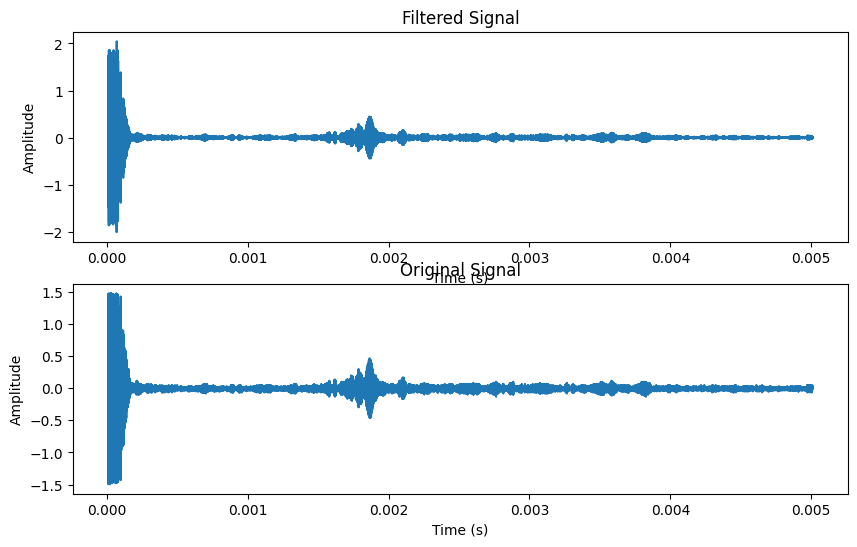

In [ ]:
index = 18
t = t18
amp = a18

# Plot the original signal, the filtered signal, and the inverse FFT of the filtered signal
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0].plot(t, filtered_signal_list[index-1])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Filtered Signal')

ax[1].plot(t,amp)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Original Signal')

plt.show()

In [ ]:
# create a pandas dataframe from the data
df = pd.DataFrame(filtered_signal_list)
df = df.transpose()
columns=['F1','F2','F3','F4','ND1','ND2','ND3','ND4','ND5','ND6','ND7','ND8','ND9','ND91','ND92','ND93','ND94','ND95']
df.columns = columns
df.to_csv('filtered_signals.csv', index=False)

***NOISY SIGNAL***

---

In [ ]:
# Generate white noise with a given standard deviation and shape
def generate_white_noise(shape, std_dev):
    return np.random.normal(0, std_dev, shape)

# Add white noise to a signal
def add_white_noise(signal, snr_db):
    signal_with_noise = []
    for i in range(len(signal)):
        curr_signal = signal[i]
        signal_power = np.sum(curr_signal**2) / curr_signal.size
        noise_power = signal_power / 10**(snr_db/10)
        noise = generate_white_noise(curr_signal.shape, np.sqrt(noise_power))
        signal_with_noise.append(curr_signal + noise)
    return signal_with_noise

signal_with_noise = add_white_noise(s_a, 20)

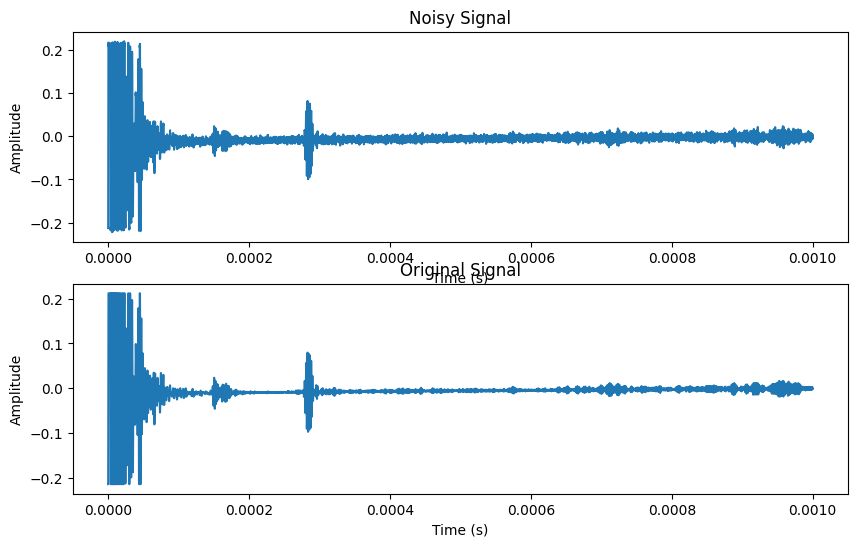

In [ ]:
index = 1
t = t1
amp = a1

# Plot the original signal, the filtered signal, and the inverse FFT of the filtered signal
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0].plot(t, signal_with_noise[index-1])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Noisy Signal')

ax[1].plot(t,amp)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Original Signal')

plt.show()

In [ ]:
# create a pandas dataframe from the data
df = pd.DataFrame(signal_with_noise)
df = df.transpose()
columns=['F1','F2','F3','F4','ND1','ND2','ND3','ND4','ND5','ND6','ND7','ND8','ND9','ND91','ND92','ND93','ND94','ND95']
df.columns = columns
df.to_csv('noisy_signals.csv', index=False)

# **DATA PREPARATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
path_unfiltered_signals = '/content/drive/MyDrive/DATASET_GSPROJ_TRANSFARCH/unfiltered_signals.csv'
path_filtered_signals = '/content/drive/MyDrive/DATASET_GSPROJ_TRANSFARCH/filtered_signals.csv'
path_noisy_signals = '/content/drive/MyDrive/DATASET_GSPROJ_TRANSFARCH/noisy_signals.csv'

df_unfiltered = pd.read_csv(path_unfiltered_signals)
df_filtered = pd.read_csv(path_filtered_signals)
df_noisy = pd.read_csv(path_noisy_signals)

In [ ]:
unfiltered_signals = np.array(df_unfiltered)
filtered_signals = np.array(df_filtered)
df_noisy = np.array(df_noisy)

In [ ]:
unfiltered_signals.shape, filtered_signals.shape, df_noisy.shape

((50002, 18), (50002, 18), (50002, 18))

In [ ]:
signals_dataset = np.concatenate((unfiltered_signals, filtered_signals, df_noisy), axis=1)
signals_dataset.shape

(50002, 54)

In [ ]:
df_Y = pd.DataFrame(signals_dataset)
columns=['F1','F2','F3','F4','ND1','ND2','ND3','ND4','ND5','ND6','ND7','ND8','ND9','ND91','ND92','ND93','ND94','ND95','F1_filt','F2_filt','F3_filt','F4_filt','ND1_filt','ND2_filt','ND3_filt','ND4_filt','ND5_filt','ND6_filt','ND7_filt','ND8_filt','ND9_filt','ND91_filt','ND92_filt','ND93_filt','ND94_filt','ND95_filt','F1_noisy','F2_noisy','F3_noisy','F4_noisy','ND1_noisy','ND2_noisy','ND3_noisy','ND4_noisy','ND5_noisy','ND6_noisy','ND7_noisy','ND8_noisy','ND9_noisy','ND91_noisy','ND92_noisy','ND93_noisy','ND94_noisy','ND95_noisy']
df_Y.columns = columns
df_Y.to_csv('signals_dataset.csv',index= False)

# **IMPORTING DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader, Dataset
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
path_data = '/content/drive/MyDrive/DATASET_GSPROJ_TRANSFARCH/signals_dataset.csv'
path_labels = '/content/drive/MyDrive/DATASET_GSPROJ_TRANSFARCH/signal_labels.csv'

signals_dataset = pd.read_csv(path_data)
df_labels = pd.read_csv(path_labels)
signals_dataset = np.array(signals_dataset,dtype="float32")
labels = np.array(df_labels)

In [ ]:
signals_dataset.dtype

dtype('float32')

# ***CLS_TOKEN & PADDING MASK***

In [ ]:
def add_clstoken (dataset,array_to_add):
    input = dataset
    cls_token = array_to_add
    input = np.concatenate = np.concatenate((cls_token, input), axis=1)
    return input

In [ ]:
def create_padding_mask(dataset):
    input = dataset
    padding_mask = (input != 0).astype(bool)
    return padding_mask

# **DATALOADER**

In [ ]:
cls_token = np.ones(labels.shape, dtype="float32")

In [ ]:
cls_token.dtype

dtype('float32')

In [ ]:
X = np.transpose(signals_dataset)
#y = np.transpose(labels)
cls_token = np.transpose(cls_token)
X.shape, cls_token.shape

((54, 50002), (54, 1))

In [ ]:
X_scaled = []
# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-1, 1))

for i in range(X.shape[0]):
    scaler.fit(X[i,:].reshape(-1,1))
    scaled_data = scaler.transform(X[i,:].reshape(-1, 1))
    X_scaled.append(scaled_data)

X_scaled = np.array(X_scaled,dtype="float32").reshape(X.shape[0],X.shape[1])

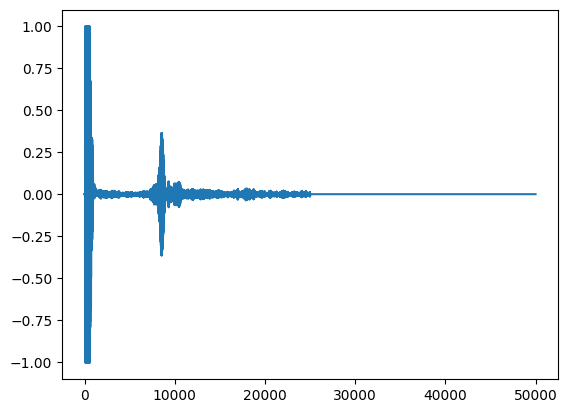

In [ ]:
plt.plot(X_scaled[6,:])
plt.show()

In [ ]:
X_scaled = add_clstoken(X_scaled,cls_token)

In [ ]:
# split data into training and test sets
X_train, X_test= train_test_split(X_scaled, test_size=0.25)

In [ ]:
X_train_padding_mask = create_padding_mask(X_train)
X_test_padding_mask = create_padding_mask(X_test)
X_train_padding_mask.shape,X_train_padding_mask, X_test_padding_mask.shape, X_test_padding_mask

((40, 50003),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 (14, 50003),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]))

In [ ]:
X_train = torch.from_numpy(X_train)
X_test= torch.from_numpy(X_test)
X_train_padding_mask = torch.from_numpy(X_train_padding_mask)
X_test_padding_mask =  torch.from_numpy(X_test_padding_mask)

#torch.tensor([[0.11111, 0.222222, 0.3333333]], dtype=torch.float64, device=torch.device('cuda:0'))

In [ ]:
torch.tensor(X_train_padding_mask).dtype

In [ ]:
# Custom dataset class
class SignalDataset(Dataset):
    def __init__(self, data, padding_mask):
        self.data = data
        self.padding_mask = padding_mask

    def __getitem__(self, index):
        signal = self.data[index]
        mask = self.padding_mask[index]
        return signal, mask

    def __len__(self):
        return len(self.data)

In [ ]:
# Create your dataset instance
train_dataset = SignalDataset(X_train, X_train_padding_mask)
test_dataset = SignalDataset(X_test, X_test_padding_mask)

In [ ]:
# Define your DataLoader with batch size 1
batch_size = 16
shuffle = True
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

# **DL ARCHITECTURE**

## **Setup**

---

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## **Model**
---

### *POSITIONAL ENCODING*

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

### *POSITION-WISE FEED-FORWARD NETWORKS*

In [ ]:
class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

### *MULTI-HEAD ATTENTION*

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output

### *ENCODER LAYER*

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

### *DECODER LAYER*

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x

### *TRANSFORMER*

In [ ]:
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output

## **Model Training**

In [ ]:
# Define your hyperparameters and other necessary configurations
src_vocab_size = X.shape[1]
tgt_vocab_size = X.shape[0]
d_model = 512
num_heads = 6
num_layers = 6
d_ff = 2048
max_seq_length = 100
dropout = 0.1

model = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)


In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

model.train()

for epoch in range(100):
    optimizer.zero_grad()
    output = model(train_data.long(), train_labels[:, :-1].long())
    loss = criterion(output.contiguous().view(-1, tgt_vocab_size), train_labels[:, 1:].contiguous().view(-1))
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

## **Model Testing**

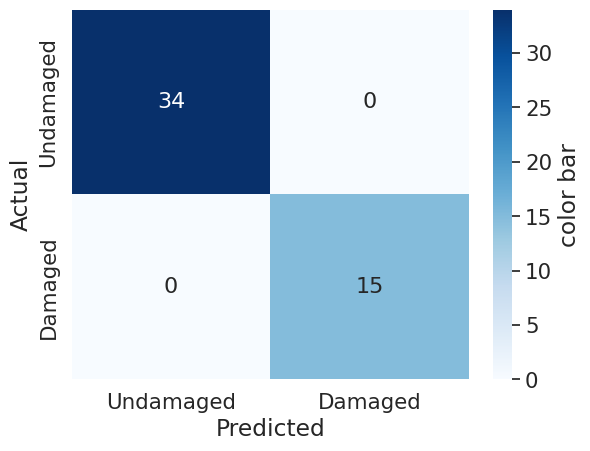

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_cm = pd.DataFrame(array, range(2), range(2))
#plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm,fmt=',d', annot=True,cmap = 'Blues', cbar_kws = {"label":"color bar"},annot_kws={"size": 16},
           xticklabels = ["Undamaged","Damaged"],yticklabels = ["Undamaged","Damaged"]) # font size
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()